In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv('/content/Uber-Ride-Demand.csv')
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [4]:
df['hour'] = df['pickup_datetime'].dt.hour
df['weekday'] = df['pickup_datetime'].dt.dayofweek
df['month'] = df['pickup_datetime'].dt.month

In [5]:
df['lag_1'] = df['trips'].shift(1)
df['lag_2'] = df['trips'].shift(2)
df['lag_3'] = df['trips'].shift(3)


In [6]:
df['rolling_mean_trips'] = df['trips'].rolling(window=3).mean()
df['time_since_start'] = (df['pickup_datetime'] - df['pickup_datetime'].min()).dt.total_seconds() / 3600  # hours
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [7]:
df = df.dropna()

In [8]:
df['log_trips'] = np.log1p(df['trips'])

In [9]:
features = [
    'distance', 'duration', 'surge_multiplier', 'temperature',
    'hour', 'weekday', 'month', 'lag_1', 'lag_2', 'lag_3',
    'rolling_mean_trips', 'time_since_start', 'is_weekend'
]
X = df[features]
y = df['log_trips']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=300,
                          random_state=42)

In [13]:
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_orig = np.expm1(y_test)

rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
r2 = r2_score(y_test_orig, y_pred)

In [14]:
print("✅ FINAL MODEL EVALUATION:")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score (Accuracy): {r2:.4f}")

✅ FINAL MODEL EVALUATION:
✅ RMSE: 1.38
✅ R² Score (Accuracy): 0.9810


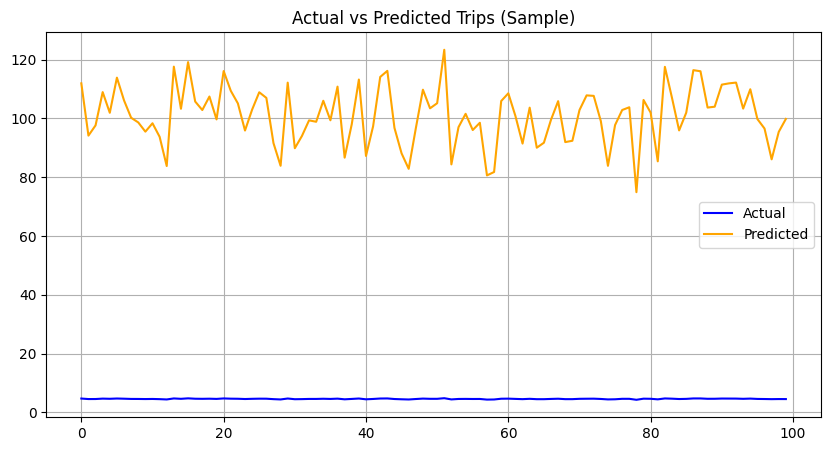

In [16]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual', color='blue')
plt.plot(y_pred[:100], label='Predicted', color='orange')
plt.title('Actual vs Predicted Trips (Sample)')
plt.legend()
plt.grid(True)
plt.show()

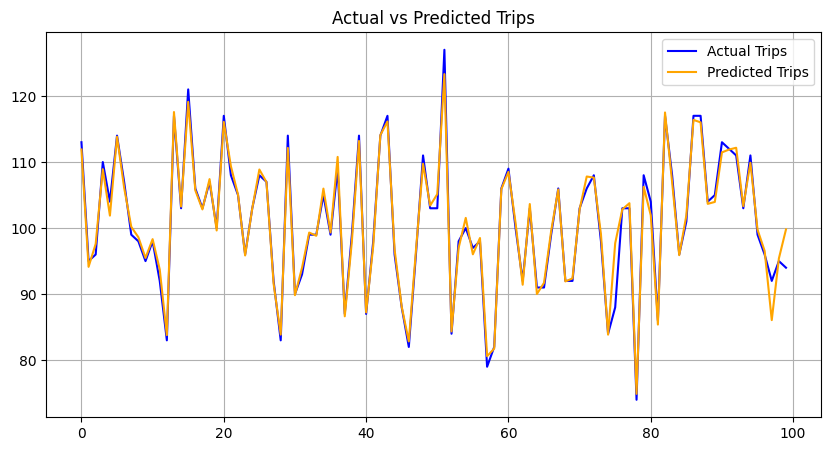

In [17]:
plt.figure(figsize=(10,5))
plt.plot(y_test_orig.values[:100], label='Actual Trips', color='blue')
plt.plot(y_pred[:100], label='Predicted Trips', color='orange')
plt.title('Actual vs Predicted Trips')
plt.legend()
plt.grid(True)
plt.show()

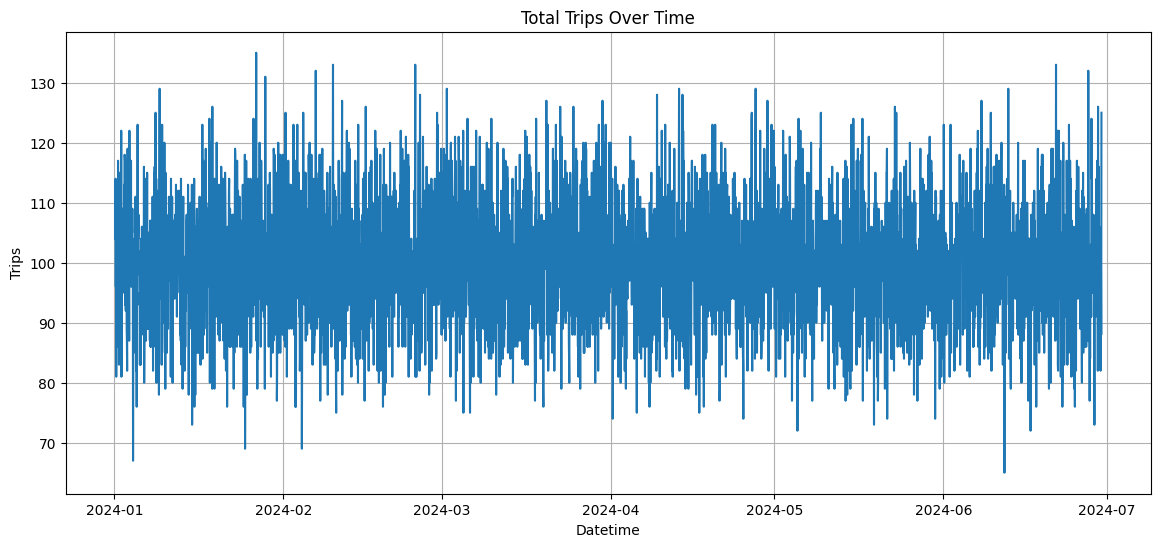

In [18]:
plt.figure(figsize=(14,6))
sns.lineplot(x='pickup_datetime', y='trips', data=df)
plt.title("Total Trips Over Time")
plt.xlabel("Datetime")
plt.ylabel("Trips")
plt.grid(True)
plt.show()


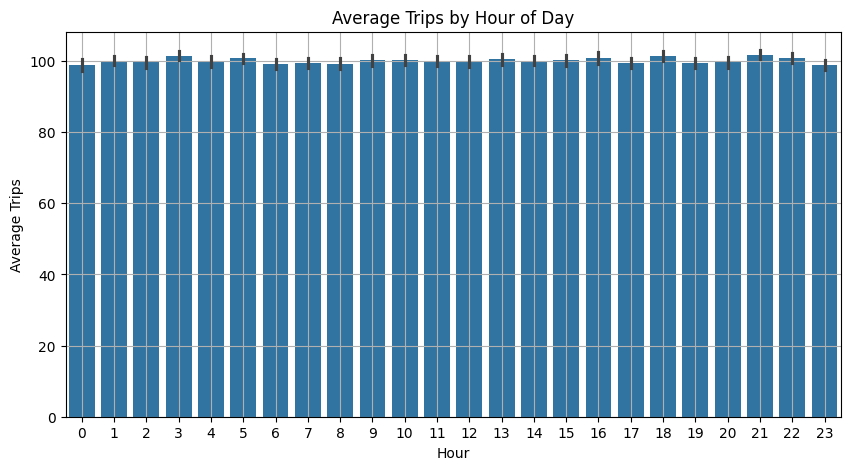

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x='hour', y='trips', data=df)
plt.title("Average Trips by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Trips")
plt.grid(True)
plt.show()


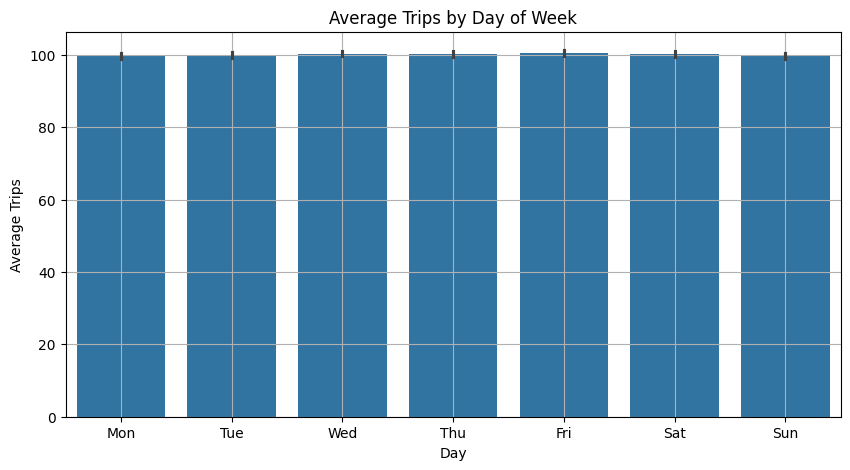

In [20]:
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(10,5))
sns.barplot(x=df['weekday'].map(lambda x: weekday_labels[x]), y=df['trips'])
plt.title("Average Trips by Day of Week")
plt.xlabel("Day")
plt.ylabel("Average Trips")
plt.grid(True)
plt.show()


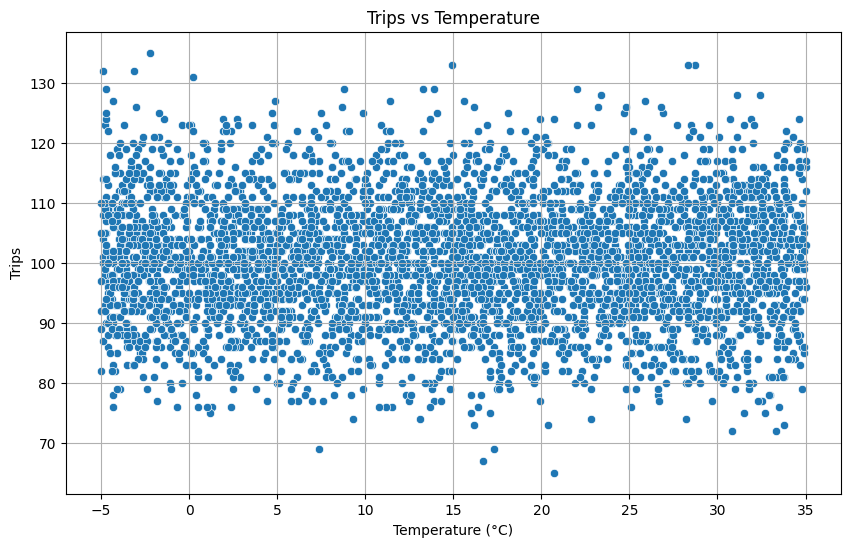

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='temperature', y='trips', data=df)
plt.title("Trips vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Trips")
plt.grid(True)
plt.show()


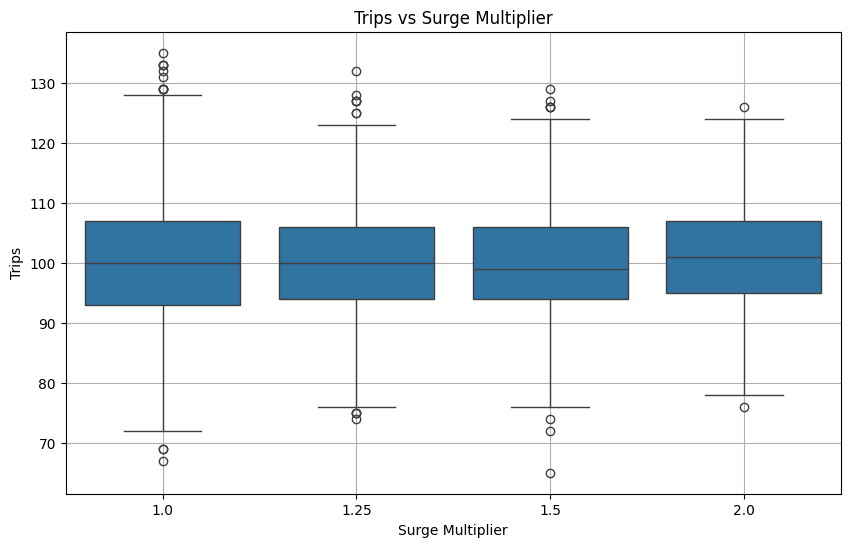

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='surge_multiplier', y='trips', data=df)
plt.title("Trips vs Surge Multiplier")
plt.xlabel("Surge Multiplier")
plt.ylabel("Trips")
plt.grid(True)
plt.show()


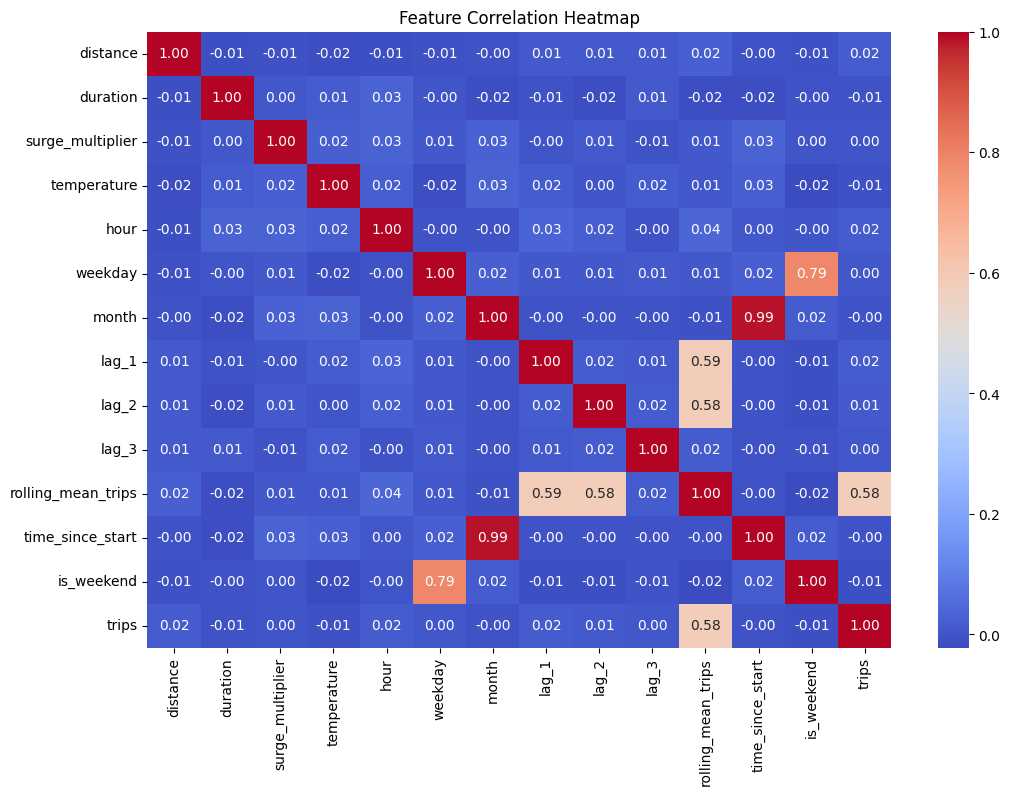

In [23]:
plt.figure(figsize=(12,8))
corr = df[features + ['trips']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


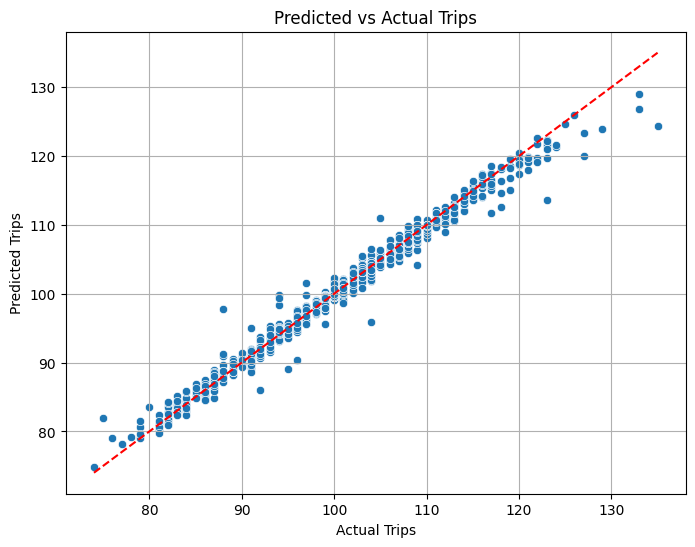

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_orig, y=y_pred)
plt.xlabel("Actual Trips")
plt.ylabel("Predicted Trips")
plt.title("Predicted vs Actual Trips")
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], '--r')
plt.grid(True)
plt.show()


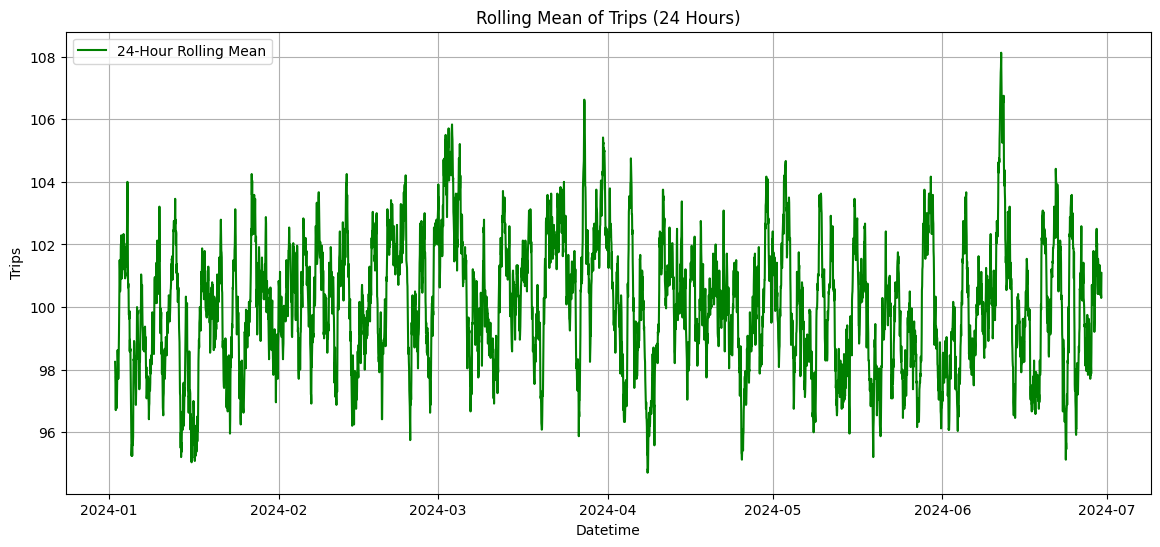

In [25]:
df['rolling_mean'] = df['trips'].rolling(24).mean()  # 1-day hourly rolling
plt.figure(figsize=(14,6))
plt.plot(df['pickup_datetime'], df['rolling_mean'], label='24-Hour Rolling Mean', color='green')
plt.title("Rolling Mean of Trips (24 Hours)")
plt.xlabel("Datetime")
plt.ylabel("Trips")
plt.grid(True)
plt.legend()
plt.show()
